In [1]:
# notebook/diabetes_data_exploration.ipynb

import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno  # Needed for Phase 2 visualization
import warnings

warnings.filterwarnings('ignore')

# --- Setup for src Folder Import ---
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

# Import all phase functions
from data_preprocessor import (
    process_phase_2_cleaning, 
    process_phase_3_transform, 
    process_phase_5_balance,
    analyze_phase_4_reduction
)
# ----------------------------------------------------------------------

# --- PHASE 1: Data Collection & Loading ---
print("### 📌 PHASE 1: Data Loading & Initial Check ###")
data_path = '../data/Diabetes Missing Data.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded. Initial shape: {df.shape}")
print("Initial missing values (must handle the implicit zeros later):")
print(df.isnull().sum())

print("----------------------------------------------------------")

### 📌 PHASE 1: Data Loading & Initial Check ###
Dataset loaded. Initial shape: (768, 9)
Initial missing values (must handle the implicit zeros later):
Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64
----------------------------------------------------------


In [2]:
sys.path

['c:\\Users\\Is lab\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'c:\\Users\\Is lab\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'c:\\Users\\Is lab\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'c:\\Users\\Is lab\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\Is lab\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'c:\\Users\\Is lab\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages',
 'c:\\Users\\Is lab\\Desktop\\Diabetes\\notebook\\..\\src']

--- 📊 Phase 2 Visual: Missingno Matrix (After Zeros to NaN) ---


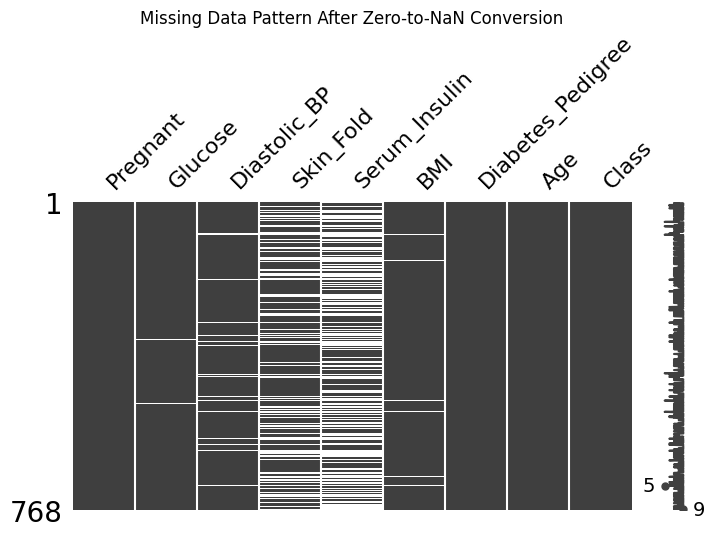


✨ Starting Phase 2: Data Cleaning and Outlier Treatment...
  -> Task 1: Biologically impossible zeros converted to NaN.
  -> Task 2: Missing NaNs filled with Median values.
  -> Task 3: Total of 497 extreme values capped.
✅ Phase 2 Completed successfully.
----------------------------------------------------------


In [3]:
# --- PHASE 2: Data Cleaning ---

IMPOSSIBLE_ZEROS_COLS = ['Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI']
temp_df_nan = df.copy() 
temp_df_nan[IMPOSSIBLE_ZEROS_COLS] = temp_df_nan[IMPOSSIBLE_ZEROS_COLS].replace(0, np.nan)

print("--- 📊 Phase 2 Visual: Missingno Matrix (After Zeros to NaN) ---")
msno.matrix(temp_df_nan, figsize=(8, 4))
plt.title('Missing Data Pattern After Zero-to-NaN Conversion')
plt.show()


# --- EXECUTE THE FULL CLEANING PIPELINE ---
df_clean = process_phase_2_cleaning(df) 
print("----------------------------------------------------------")


🚀 Starting Phase 3: Feature Transformation (Engineering, Encoding, Scaling)...
  -> Task 1: 3 new categorical features created.
  -> Task 2: Encoding complete. Shape: (768, 16)
  -> Task 3: Scaling (StandardScaler) applied to original numerical features.
✅ Phase 3 Completed successfully.
--- 📊 Phase 3 Visual: Scaled Feature Distribution ---


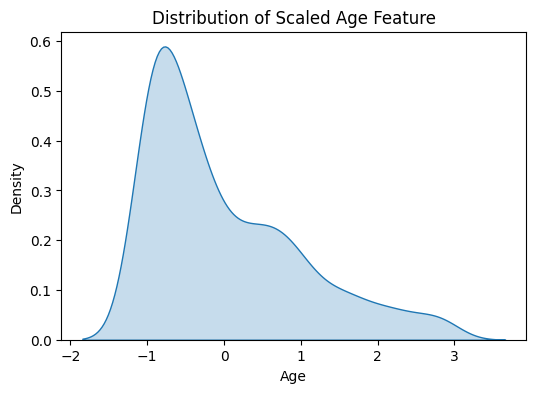

----------------------------------------------------------


In [4]:
# PHASE 3 Execution
df_transformed = process_phase_3_transform(df_clean)

# --- Visualization for Phase 3 ---
print("--- 📊 Phase 3 Visual: Scaled Feature Distribution ---")
plt.figure(figsize=(6, 4))
sns.kdeplot(df_transformed['Age'], fill=True)
plt.title('Distribution of Scaled Age Feature')
# The distribution should be centered around 0 with narrow spread.
plt.show()

print("----------------------------------------------------------")


### 📉 PHASE 4: Data Reduction (Exploratory Check) ###
Top 8 Features Correlated with Target (Decision-making data):
Class                        1.000000
Glucose                      0.492782
Glucose_Category_Diabetic    0.414455
BMI                          0.312811
BMI_Category_Obese           0.296609
Serum_Insulin                0.266382
Age                          0.242702
Pregnant                     0.220392
Name: Class, dtype: float64
---------------------------------------------------------
--- 📊 Phase 4 Visual: Feature Correlation Heatmap ---


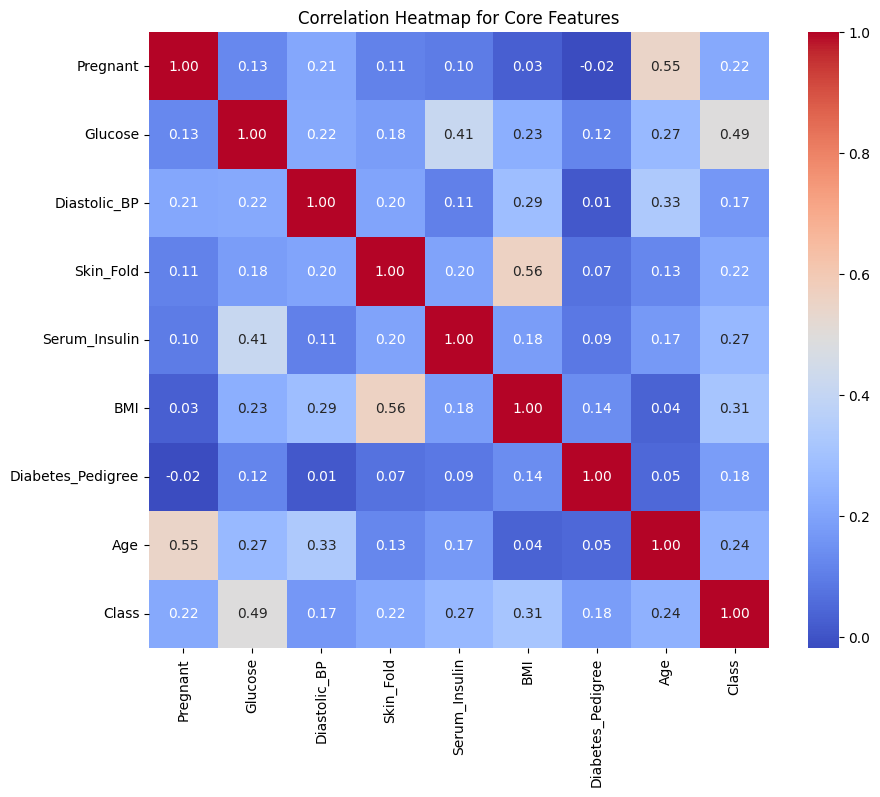

----------------------------------------------------------


In [5]:
# PHASE 4 Execution
analyze_phase_4_reduction(df_transformed)

# --- Visualization for Phase 4 ---
print("--- 📊 Phase 4 Visual: Feature Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
# Select only the original numerical columns + the target for a cleaner visualization
cols_to_show = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age', 'Class']
sns.heatmap(df_transformed[cols_to_show].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Core Features')
plt.show()

print("----------------------------------------------------------")


⚖️ Starting Phase 5: Data Imbalance Handling (SMOTE)...
  -> Class Distribution BEFORE SMOTE: Counter({0: 500, 1: 268})
  -> Class Distribution AFTER SMOTE: Counter({1: 500, 0: 500})
  -> Total samples increased to 1000.
✅ Phase 5 Completed successfully.
--- 📊 Phase 5 Visual: Balanced Target Class Distribution ---


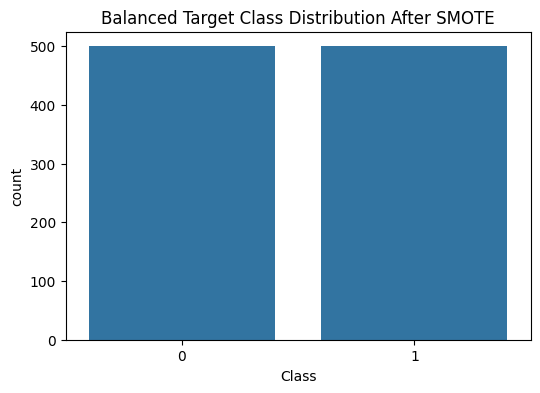

----------------------------------------------------------
✅ Final Cleaned and Balanced Dataset saved to: ../data/processed_diabetes_data_balanced.csv


In [6]:
# PHASE 5 Execution
df_balanced = process_phase_5_balance(df_transformed)

# --- Visualization for Phase 5 ---
print("--- 📊 Phase 5 Visual: Balanced Target Class Distribution ---")
plt.figure(figsize=(6, 4))
sns.countplot(x=df_balanced['Class'])
plt.title('Balanced Target Class Distribution After SMOTE')
plt.show()

print("----------------------------------------------------------")

# --- Final Step: Save Processed Dataset ---
final_data_path = '../data/processed_diabetes_data_balanced.csv'
df_balanced.to_csv(final_data_path, index=False)
print(f"✅ Final Cleaned and Balanced Dataset saved to: {final_data_path}")